___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Случайные леса (Random Forest) - Классификация

## Данные

Мы будем использовать один и тот же набор данных для всех методов классификации на основе деревьев (Деревья решений - Decision Tree, Случайные леса - Random Forests и Расширяемые деревья - Gradient Boosted Trees). Это позволит нам сравнивать работу этих методов между собой.

Мы будем работать с набором данных "Palmer Penguins" - он достаточно простой для того, чтобы мы могли понять влияние гиперпараметров на результаты классификации.

<img src="penguin.jpg" style="max-width:400px">

Данные были собраны и предоставлены Кристиной Горман и антарктической станцией Палмер, расположенной на острове Анверс, к северу от Южного полярного круга.  

Более подробно см. следующую работу на английском языке: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081


* penguins_size.csv: Упрощённые данные из исходного набора данных о пингвинах. Содержит следующие переменные:

    * species: разновидности пингвинов - Антарктический пингвин (Chinstrap), Пингвин Адели (Adélie) или Папуанский пингвин (Gentoo)
    * culmen_length_mm: длина клюва (mm)
    * culmen_depth_mm: высота клюва (mm)
    * flipper_length_mm: длина крыла (mm)
    * body_mass_g: масса тела (g)
    * island: название острова (Dream, Torgersen или Biscoe) на архипелаге Палмер (Антарктика)
    * sex: пол пингвина

**Наша цель - создать модель, которая поможет нам определять вид пингвина на основе его физических атрибутов, чтобы исследователи могли с помощью этой модели классифицировать пингвинов, без необходимости привлечения опытного биолога.**

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [4]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Случайные леса для классификации - Random Forest Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [9]:
# Используем 10 случайных деревьев

# ВНИМАНИЕ! В будущих версиях Scikit-Learn поменялся параметр max_features, 
# вместо auto нужно указывать sqrt (либо вообще не указывать т.к. это значение по умолчанию)
#
#model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [10]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [11]:
preds = model.predict(X_test)

## Оценка работы модели

In [12]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис для следующих методов:
#  - вместо plot_confusion_matrix нужно будет использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions.
#  - вместо plot_precision_recall_curve нужно будет использовать PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
#  - вместо plot_roc_curve нужно будет использовать RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions

#from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [13]:
confusion_matrix(y_test,preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

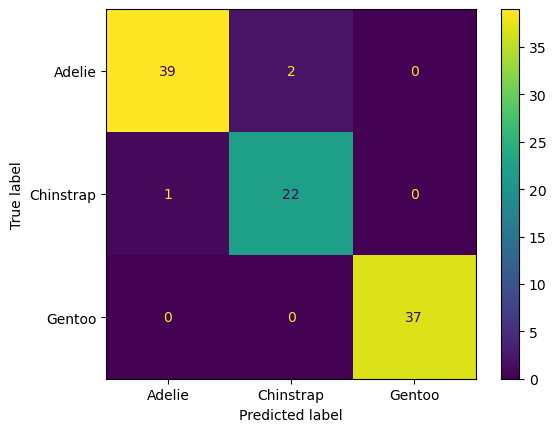

In [14]:
#ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plot_confusion_matrix(model,X_test,y_test)

## Важность признаков

Очень полезный атрибут обученной модели!

In [15]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

## Выбираем правильное количество деревьев

Давайте исследуем, приведёт ли добавление дополнительных деревьев к улучшению производительности...

In [16]:
test_error = []

for n in range(1,40):
    # Используем n случайных деревьев
#    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

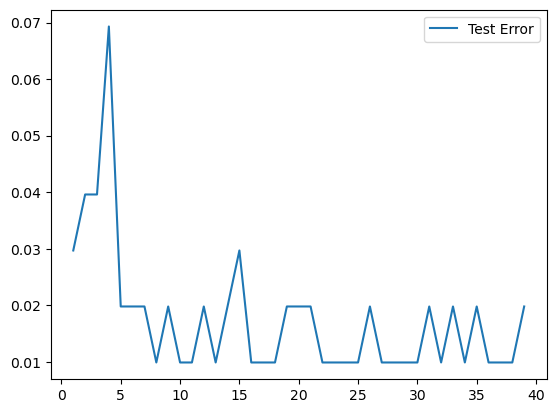

In [17]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Здесь ясно видно, что мы получаем всё меньше пользы при добавлении дополнительных деревьев. Для такого маленького набора данных, мы по сути уже извлекли всю нужную информацию с помощью примерно 5 деревьев.

# Случайные леса - исследование гиперпараметров

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [18]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [19]:
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

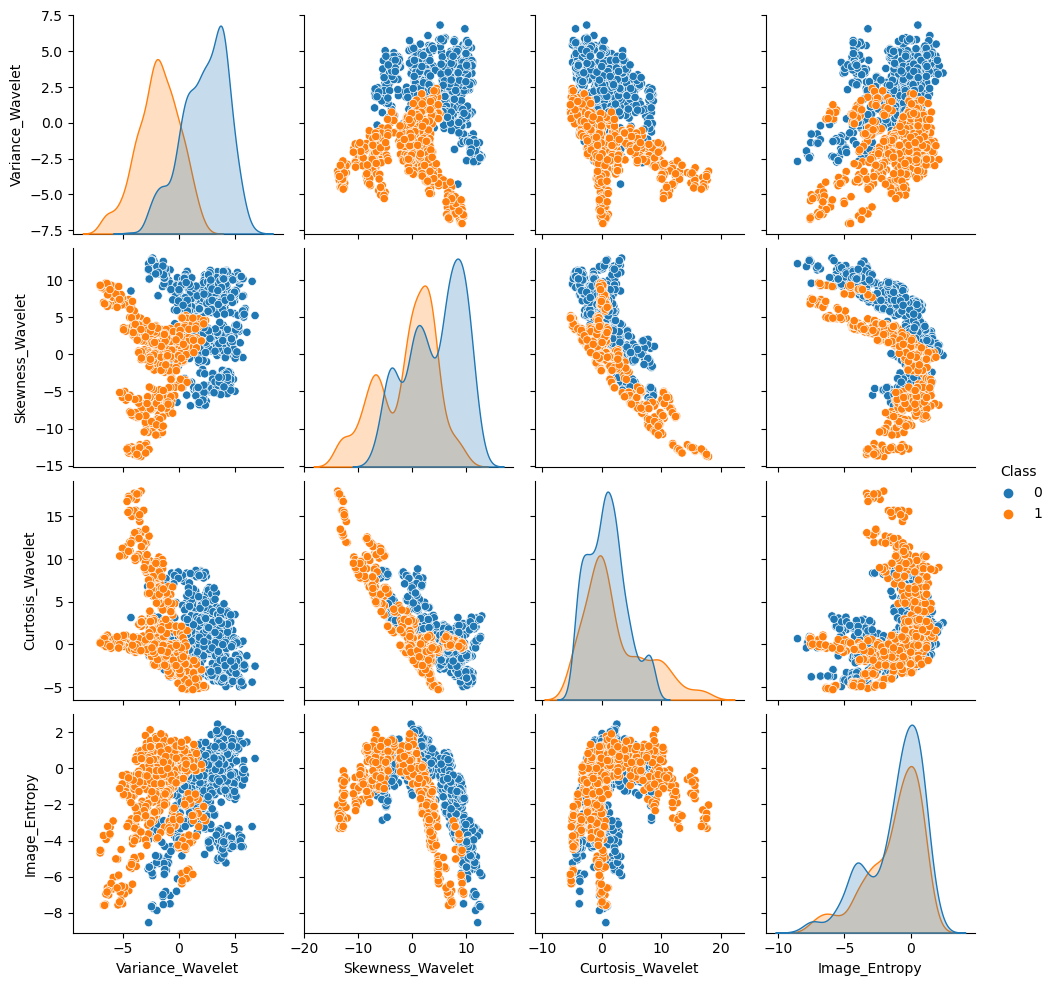

In [20]:
sns.pairplot(df,hue='Class')

In [21]:
X = df.drop("Class",axis=1)

In [22]:
y = df["Class"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True] # [True,False]

In [27]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # oob_score имеет смысл только при bootstrap=True!

In [28]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [29]:
grid.fit(X_train,y_train)

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ML/lib/python3.7/sit

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True]})

In [30]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': True}

In [31]:
predictions = grid.predict(X_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



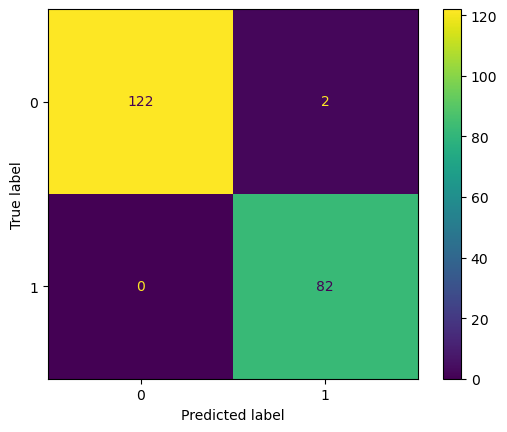

In [33]:
#ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)
plot_confusion_matrix(grid,X_test,y_test)

In [34]:
# Без нижнего подчёркивания в конце - получаем исходный параметр oob_score
grid.best_estimator_.oob_score

True

In [35]:
# С нижним подчёркиванием в конце - получаем значение метрики oob_score, вычисленное при обучении модели
# (атрибут oob_score_ присутствует только в том случае, если параметр oob_score равен True)
grid.best_estimator_.oob_score_

0.9948542024013722

## Количество деревьев -  Number of Estimators (Trees)

Давайте нарисуем график зависимости ошибки от количества деревьев (Error vs. Number of Estimators).

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # Более подробно об этой строке кода см. в видео-лекции!!
    errors.append(err)
    misclassifications.append(n_missed)

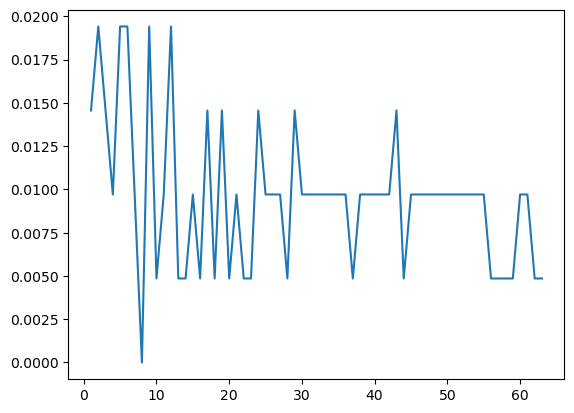

In [38]:
plt.plot(range(1,64),errors)

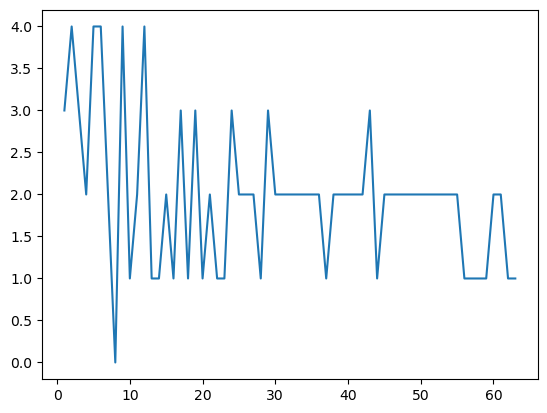

In [39]:
plt.plot(range(1,64),misclassifications)